<a href="https://colab.research.google.com/github/MarioStojmanovski10/VNP-Proekt/blob/master/%D0%92%D0%9D%D0%9F_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime


In [56]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
import locale


file_path = '/content/drive/MyDrive/TradeData_6_14_2024_23_44_30.csv'
try:
    trade_data = pd.read_csv(file_path, skiprows=4, sep=',', encoding='ISO-8859-1')
except Exception as e:
    print(f"Error reading the file: {e}")
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')


filtered_data = trade_data.iloc[:, [3, 8, 41]]
filtered_data.columns = ['Year', 'Country', 'ExportValue']
filtered_data['ExportValue'] = filtered_data['ExportValue'].apply(lambda x: locale.format_string("%d", x, grouping=True))

filtered_data

<ipython-input-58-30d6a27aa172>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ExportValue'] = filtered_data['ExportValue'].apply(lambda x: locale.format_string("%d", x, grouping=True))


,Year,Country,ExportValue
0,2020,Algeria,"2,986,921,395"
1,2019,Algeria,"3,238,634,545"
2,2019,Andorra,"2,204,294,034"
3,2020,Andorra,"1,674,864,225"
4,2018,Angola,"631,124,522"
...,...,...,...
414,2020,Samoa,"209,021,833"
415,2019,Samoa,"759,504,802"
416,2019,Zambia,"1,011,822,349"
417,2018,Zambia,"953,204,795"


In [59]:
filtered_data.to_csv('/content/Filtered_TradeData.csv', index=False)

filtered_file_path = '/content/Filtered_TradeData.csv'

filtered_data = pd.read_csv(filtered_file_path)

filtered_data

,Year,Country,ExportValue
0,2020,Algeria,"2,986,921,395"
1,2019,Algeria,"3,238,634,545"
2,2019,Andorra,"2,204,294,034"
3,2020,Andorra,"1,674,864,225"
4,2018,Angola,"631,124,522"
...,...,...,...
414,2020,Samoa,"209,021,833"
415,2019,Samoa,"759,504,802"
416,2019,Zambia,"1,011,822,349"
417,2018,Zambia,"953,204,795"


In [62]:
file_path = '/content/drive/MyDrive/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_334488.csv'
data = pd.read_csv(file_path, skiprows=4)

selected_data = data[['Country Name', '2018', '2019', '2020']]

print(selected_data)


                    Country Name       2018       2019       2020
0                          Aruba   8.310000   8.180000   8.670000
1    Africa Eastern and Southern  62.242631  63.387090  66.123449
2                    Afghanistan  17.960000  18.510000  17.580000
3     Africa Western and Central  75.960030  75.328928  76.102819
4                         Angola  55.940000  54.390000  61.020000
..                           ...        ...        ...        ...
261                       Kosovo        NaN        NaN        NaN
262                  Yemen, Rep.   2.910000   3.010000   3.530000
263                 South Africa   8.070000   8.840000   9.760000
264                       Zambia  81.870000  81.480000  81.840000
265                     Zimbabwe  80.430000  81.520000  84.360000

[266 rows x 4 columns]


In [63]:
melted_data = pd.melt(selected_data, id_vars=['Country Name'], var_name='Year', value_name='RenewableEnergy')

melted_data['Year'] = melted_data['Year'].astype(int)

print(melted_data.head())

                  Country Name  Year  RenewableEnergy
0                        Aruba  2018         8.310000
1  Africa Eastern and Southern  2018        62.242631
2                  Afghanistan  2018        17.960000
3   Africa Western and Central  2018        75.960030
4                       Angola  2018        55.940000


In [64]:
merged_data = pd.merge(filtered_data, melted_data, left_on=['Country', 'Year'], right_on=['Country Name', 'Year'], how='left')

merged_data.drop('Country Name', axis=1, inplace=True)

merged_data

,Year,Country,ExportValue,RenewableEnergy
0,2020,Algeria,"2,986,921,395",0.15
1,2019,Algeria,"3,238,634,545",0.16
2,2019,Andorra,"2,204,294,034",18.46
3,2020,Andorra,"1,674,864,225",21.86
4,2018,Angola,"631,124,522",55.94
...,...,...,...,...
414,2020,Samoa,"209,021,833",37.54
415,2019,Samoa,"759,504,802",34.21
416,2019,Zambia,"1,011,822,349",81.48
417,2018,Zambia,"953,204,795",81.87


In [65]:
filtered_data.to_csv('/content/drive/MyDrive/Filtered_TradeEnergy.csv', index=False)
merged_data

,Year,Country,ExportValue,RenewableEnergy
0,2020,Algeria,"2,986,921,395",0.15
1,2019,Algeria,"3,238,634,545",0.16
2,2019,Andorra,"2,204,294,034",18.46
3,2020,Andorra,"1,674,864,225",21.86
4,2018,Angola,"631,124,522",55.94
...,...,...,...,...
414,2020,Samoa,"209,021,833",37.54
415,2019,Samoa,"759,504,802",34.21
416,2019,Zambia,"1,011,822,349",81.48
417,2018,Zambia,"953,204,795",81.87


In [66]:
filtered_file_path = '/content/drive/MyDrive/filtered_data.csv'

filtered_data = pd.read_csv(filtered_file_path)

filtered_data

,Country,Year,Value,Unit
0,Australia,2018,7.730,Micrograms per cubic metre
1,Australia,2019,9.320,Micrograms per cubic metre
2,Australia,2020,8.250,Micrograms per cubic metre
3,Austria,2018,12.720,Micrograms per cubic metre
4,Austria,2019,11.580,Micrograms per cubic metre
...,...,...,...,...
716,Middle East and North Africa,2018,47.095,Micrograms per cubic metre
717,Middle East and North Africa,2019,46.754,Micrograms per cubic metre
718,Mayotte,2018,8.880,Micrograms per cubic metre
719,Mayotte,2019,8.040,Micrograms per cubic metre


In [67]:
df1 = pd.read_csv('/content/drive/MyDrive/filtered_data5.csv')

df2 = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')

merged_df = pd.merge(df1, df2[['Country', 'Year', 'Value']], on=['Country', 'Year'], how='left')

merged_df = merged_df.rename(columns={'Value': '2.5pm'})

print("Merged DataFrame with added 2.5pm column:")
print(merged_df)



Merged DataFrame with added 2.5pm column:
     Year  Country    ExportValue  RenewableEnergy  2.5pm
0    2020  Algeria  2,986,921,395             0.15  25.60
1    2019  Algeria  3,238,634,545             0.16  24.36
2    2019  Andorra  2,204,294,034            18.46   9.51
3    2020  Andorra  1,674,864,225            21.86   9.58
4    2018   Angola    631,124,522            55.94  24.20
..    ...      ...            ...              ...    ...
414  2020    Samoa    209,021,833            37.54  11.60
415  2019    Samoa    759,504,802            34.21  11.90
416  2019   Zambia  1,011,822,349            81.48  23.20
417  2018   Zambia    953,204,795            81.87  23.36
418  2020   Zambia    555,624,813            81.84  24.33

[419 rows x 5 columns]


In [68]:
merged_df

,Year,Country,ExportValue,RenewableEnergy,2.5pm
0,2020,Algeria,"2,986,921,395",0.15,25.60
1,2019,Algeria,"3,238,634,545",0.16,24.36
2,2019,Andorra,"2,204,294,034",18.46,9.51
3,2020,Andorra,"1,674,864,225",21.86,9.58
4,2018,Angola,"631,124,522",55.94,24.20
...,...,...,...,...,...
414,2020,Samoa,"209,021,833",37.54,11.60
415,2019,Samoa,"759,504,802",34.21,11.90
416,2019,Zambia,"1,011,822,349",81.48,23.20
417,2018,Zambia,"953,204,795",81.87,23.36


In [69]:
nan_values = merged_df.isna().sum()
print("NaN вредности по колони:")
print(nan_values)


NaN вредности по колони:
Year                0
Country             0
ExportValue         0
RenewableEnergy    83
2.5pm              59
dtype: int64


In [70]:
df_cleaned = merged_df.dropna()

In [71]:
nan_values_after = df_cleaned.isna().sum()
print("NaN вредности по колони по отстранување:")
print(nan_values_after)

NaN вредности по колони по отстранување:
Year               0
Country            0
ExportValue        0
RenewableEnergy    0
2.5pm              0
dtype: int64


In [72]:
df_cleaned

,Year,Country,ExportValue,RenewableEnergy,2.5pm
0,2020,Algeria,"2,986,921,395",0.15,25.60
1,2019,Algeria,"3,238,634,545",0.16,24.36
2,2019,Andorra,"2,204,294,034",18.46,9.51
3,2020,Andorra,"1,674,864,225",21.86,9.58
4,2018,Angola,"631,124,522",55.94,24.20
...,...,...,...,...,...
414,2020,Samoa,"209,021,833",37.54,11.60
415,2019,Samoa,"759,504,802",34.21,11.90
416,2019,Zambia,"1,011,822,349",81.48,23.20
417,2018,Zambia,"953,204,795",81.87,23.36


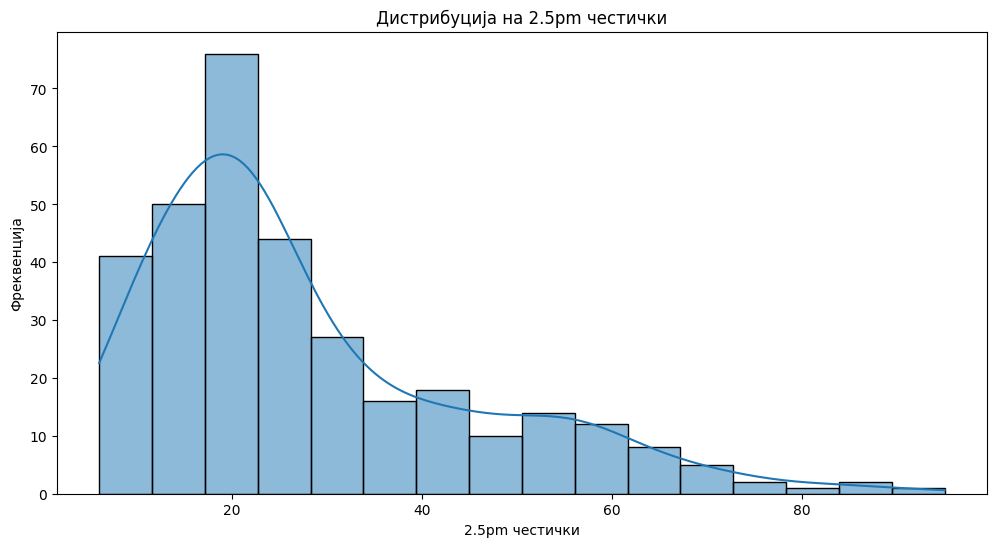

In [73]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['2.5pm'], kde=True)
plt.title('Дистрибуција на 2.5pm честички')
plt.xlabel('2.5pm честички')
plt.ylabel('Фреквенција')
plt.show()

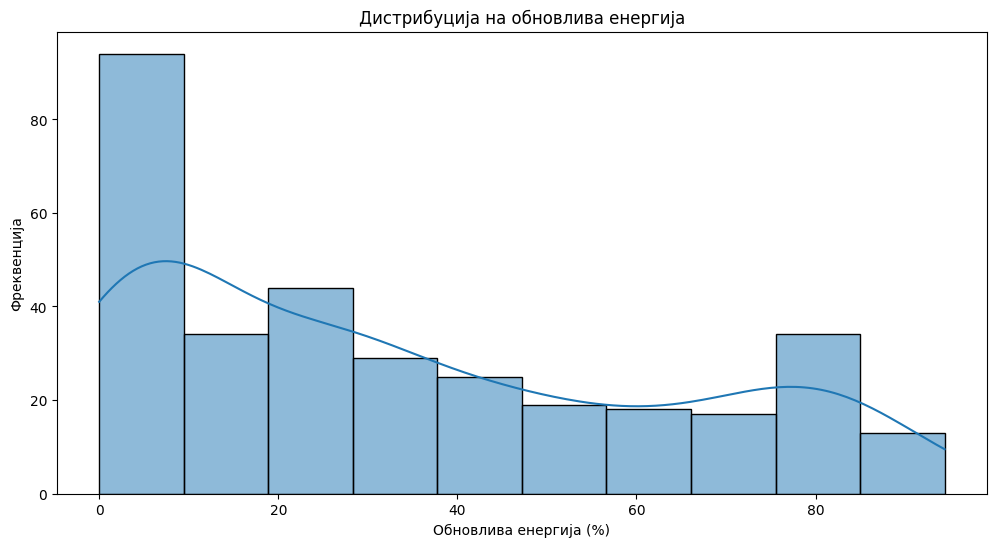

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['RenewableEnergy'], kde=True)
plt.title('Дистрибуција на обновлива енергија')
plt.xlabel('Обновлива енергија (%)')
plt.ylabel('Фреквенција')
plt.show()

In [75]:
df_cleaned['ExportValue'] = df_cleaned['ExportValue'].str.replace(',', '').astype(float)


<ipython-input-75-88bc411ef7ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ExportValue'] = df_cleaned['ExportValue'].str.replace(',', '').astype(float)


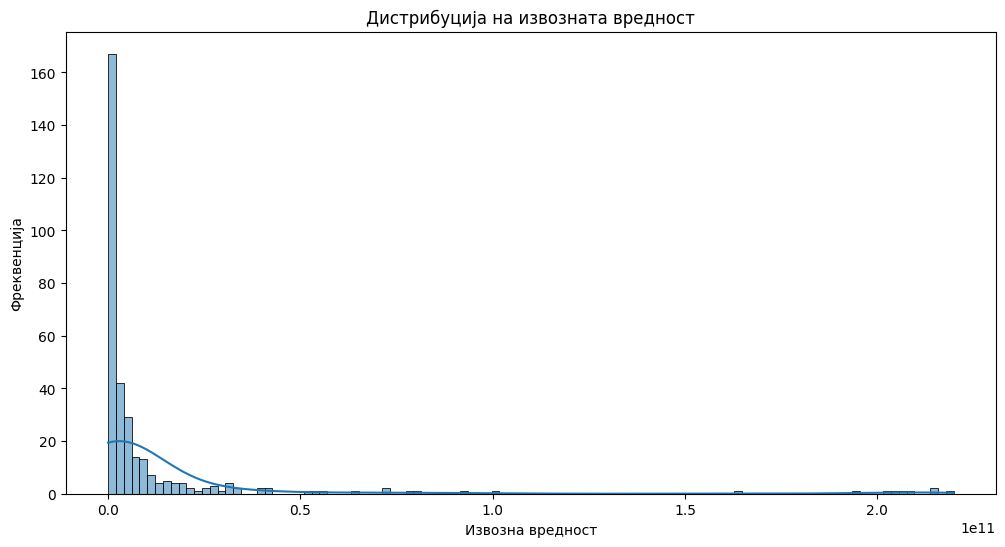

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['ExportValue'], kde=True)
plt.title('Дистрибуција на извозната вредност')
plt.xlabel('Извозна вредност')
plt.ylabel('Фреквенција')
plt.show()

In [77]:
correlation = df_cleaned[['2.5pm', 'RenewableEnergy', 'ExportValue']].corr()
print("Корелација помеѓу променливите:")
print(correlation)

Корелација помеѓу променливите:
                    2.5pm  RenewableEnergy  ExportValue
2.5pm            1.000000         0.229826    -0.024616
RenewableEnergy  0.229826         1.000000    -0.204532
ExportValue     -0.024616        -0.204532     1.000000


In [78]:
X = df_cleaned[['2.5pm', 'RenewableEnergy']]
y = df_cleaned['ExportValue']

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 8.932074814718596e+20
